In [175]:
import random
from collections import defaultdict
import numpy as np
# ---- Configuration ----

TEMPERATURE = 0.5  # Minimum total glue strength required to bind
GRID_SIZE = 50   # Grid size (for visualization and boundary)
GLUE_STRENGTH = {
    ('A', 'A'): 2,
    ('B', 'B'): 1,
    ('C', 'C'): 1,
    ('D', 'D'): 2,
    # Add cross-pairings as 0
}

# ---- Data Structures ----

class Tile:
    def __init__(self, north, east, south, west, name='T'):
        self.glues = {'N': north, 'E': east, 'S': south, 'W': west}
        self.name = name
        self.isBoundry = None

    def get_glue(self, direction):
        return self.glues[direction]

class Assembly:
    def __init__(self, tile_set, glue_strengths, temperature):
        self.asmbDict = defaultdict(lambda: None)
        self.boundaryTiles = dict()
        self.tile_set = tile_set
        self.glue_strength = glue_strengths
        self.temperature = temperature
        self.seed_pos = (0, 0)
        self.asmbDict[self.seed_pos] = tile_set[0]  # First tile is the seed


    def neighbor_positions(self, x, y):
        return {
            'N': (x, y + 1),
            'E': (x + 1, y),
            'S': (x, y - 1),
            'W': (x - 1, y)
        }

    def try_attach_tile(self, x, y):
        if self.asmbDict[(x, y)] is not None:
            return  # already filled
        neighbor_pos = self.neighbor_positions(x, y)
        best_tile = None
        candidates = []
        for tile in self.tile_set:
            strength = 0
            for direction, (nx, ny) in neighbor_pos.items():
                neighbor = self.asmbDict[(nx, ny)]
                if neighbor:
                    opposite = {'N': 'S', 'S': 'N', 'E': 'W', 'W': 'E'}[direction]
                    g1 = tile.get_glue(direction)
                    g2 = neighbor.get_glue(opposite)
                    strength += self.glue_strength.get((g1, g2), 0)
            if strength >= self.temperature:
                candidates.append((tile, strength))
        if candidates:
            tile, _ = random.choice(candidates)
            self.asmbDict[(x, y)] = tile

    def grow(self):
        # Get current tiles and try to attach at neighboring empty spots
        current_tiles = list(self.asmbDict.items())
        for (x, y), tile in current_tiles:
            for nx, ny in self.neighbor_positions(x, y).values():
                self.try_attach_tile(nx, ny)


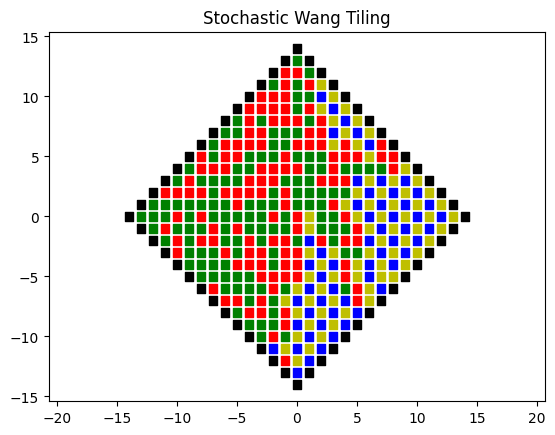

In [176]:
# ---- Tile Set ----

tiles = [
    Tile('A', 'B', 'A', 'C', name='Seed'),  # seed tile
    Tile('A', 'C', 'A', 'C', name='T1'),
    Tile('B', 'B', 'C', 'A', name='T2'),
    Tile('C', 'A', 'B', 'B', name='T3'),
    Tile('D', 'D', 'D', 'D', name='T4')
]
colorMap = {"Seed":"r", "T1":"g", "T2":"b", "T3":"y"}


# ---- Run Assembly ----

assembly = Assembly(tiles, GLUE_STRENGTH, TEMPERATURE)

for _ in range(7):
    assembly.grow()



xs, ys, labels = zip(*[(x, y, (colorMap[tile.name] if tile!=None else "k")) for (x, y), tile in assembly.asmbDict.items()])
# colors = [colorMap[label] for label in labels]

plt.scatter(xs, ys, s=40, c=labels, marker="s")

plt.title("Stochastic Wang Tiling")
plt.axis('equal')
plt.show()



In [177]:
np.max(ys)

14

In [162]:
a = defaultdict(lambda:None)

In [165]:
a[1]; a[2]; a[3]

In [166]:
a.items()

dict_items([(1, None), (2, None), (3, None)])

In [171]:
a.get(5,0)

0

In [63]:
a = dict()

In [67]:
dir(a)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']